# Análisis de Outliers, Selección de Características y Preparación para Modelado
=============================================================================

In [5]:
from preparacion_modelado_v3 import load_data, analyze_outliers, feature_selection, prepare_data_for_modeling

1. Cargar datos

In [2]:
file_path = '../SDG-PruebaTecnica/dataset.csv'
df = load_data(file_path)

Datos cargados: 100000 filas y 100 columnas


2. Analizar outliers


=== ANÁLISIS DE OUTLIERS ===

Columnas con mayor porcentaje de outliers (IQR method):
change_rev: 25816 outliers (25.82%) [límites: -20.88, 15.15]
roam_Mean: 18914 outliers (18.91%) [límites: -0.35, 0.59]
truck: 18555 outliers (18.55%) [límites: 0.00, 0.00]
plcd_dat_Mean: 14980 outliers (14.98%) [límites: 0.00, 0.00]
callwait_Mean: 14305 outliers (14.31%) [límites: -2.00, 3.33]
cc_mou_Mean: 14265 outliers (14.27%) [límites: -4.31, 7.18]
datovr_Mean: 13673 outliers (13.67%) [límites: 0.00, 0.00]
change_mou: 13490 outliers (13.49%) [límites: -312.00, 288.00]
ccrndmou_Mean: 13456 outliers (13.46%) [límites: -6.00, 10.00]
comp_dat_Mean: 13393 outliers (13.39%) [límites: 0.00, 0.00]

Visualizando distribución de variables con más outliers:


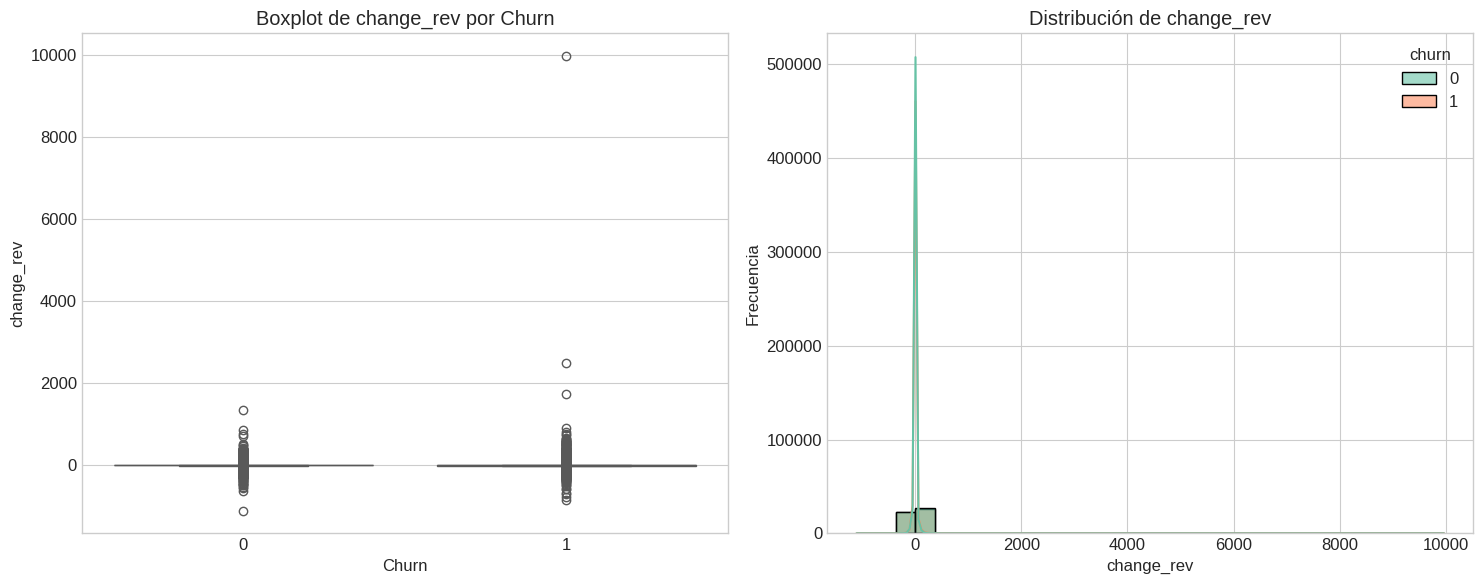

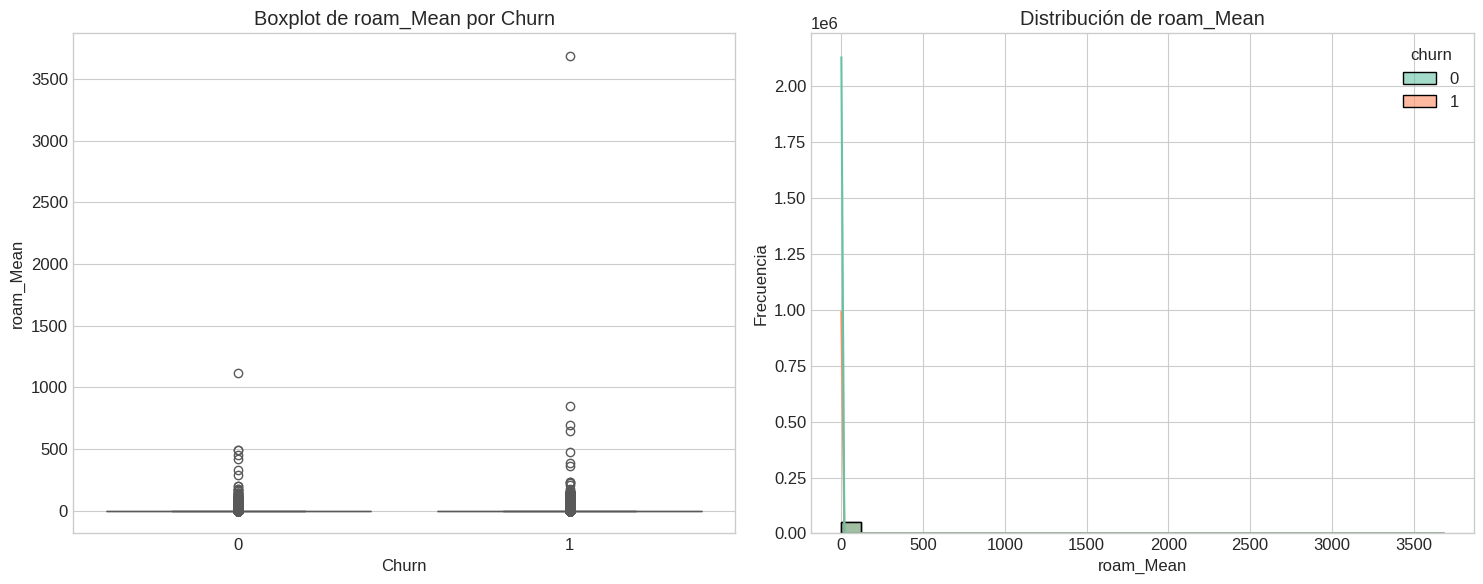

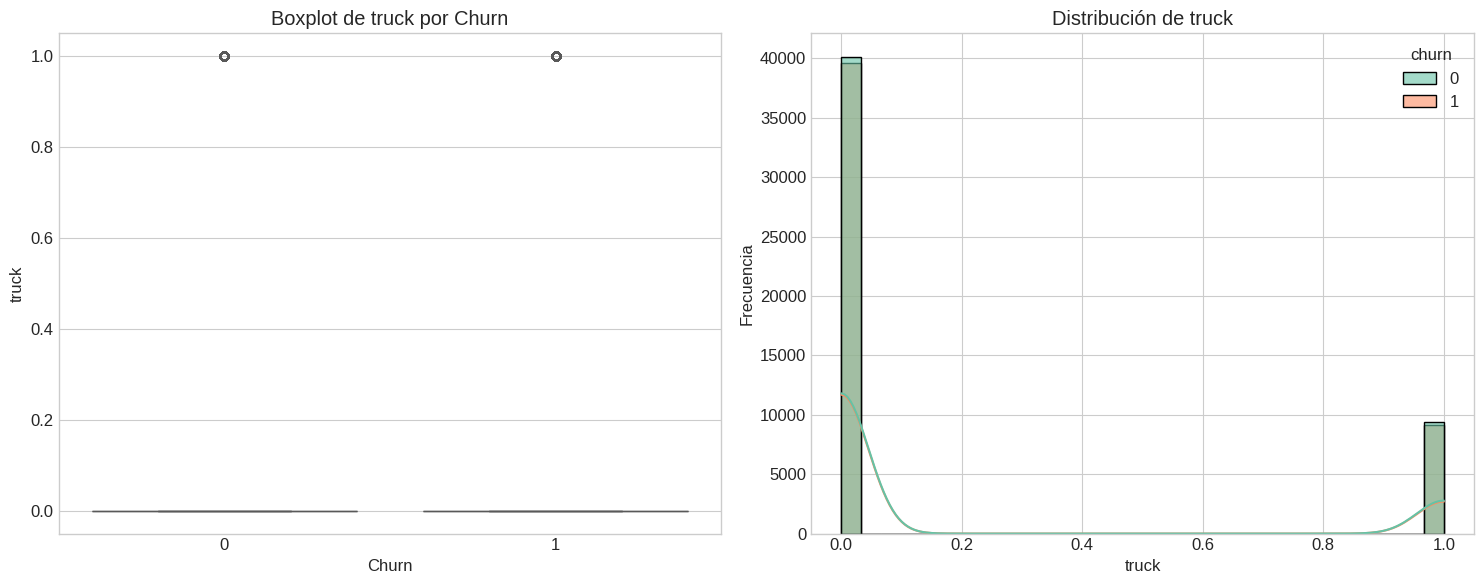

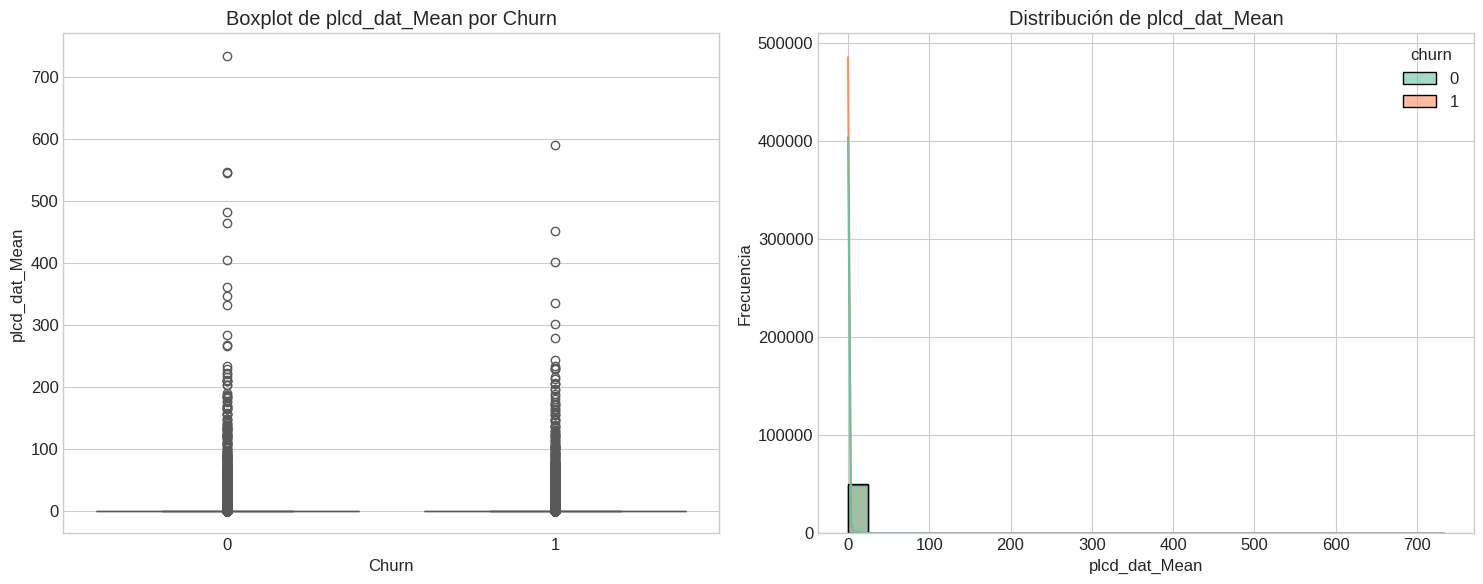

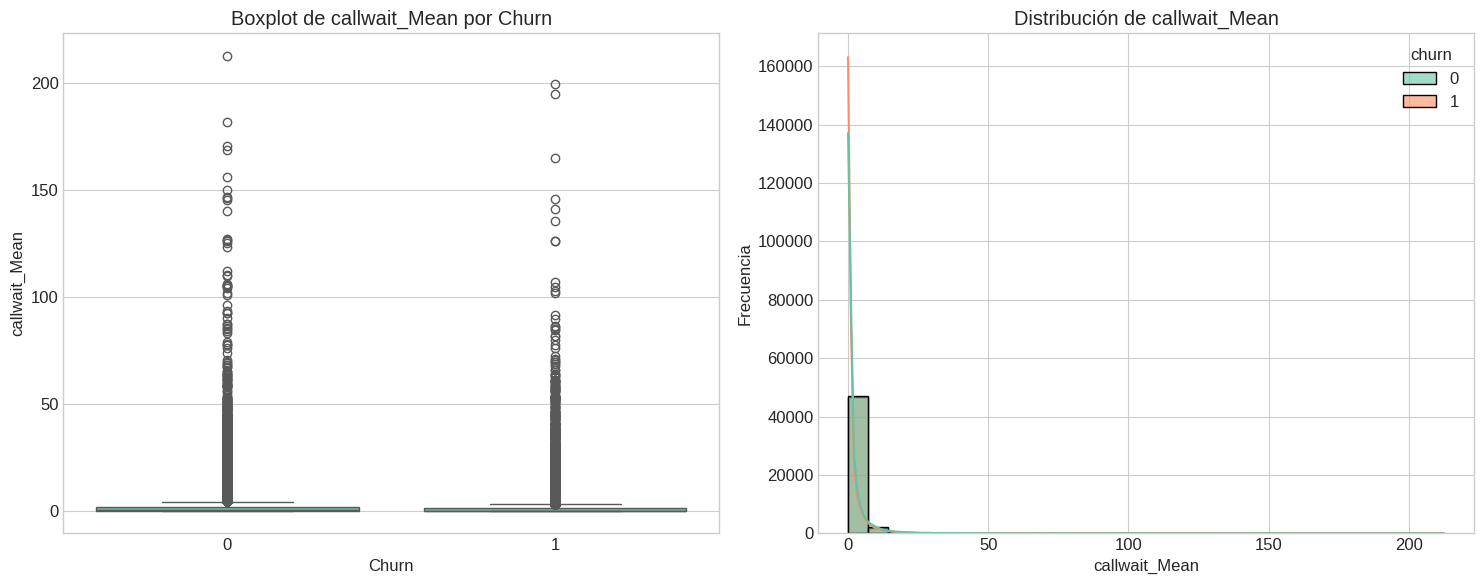


Clientes con mayor número de variables atípicas:
Cliente 1002303: 61 variables atípicas (Churn: 1)
Cliente 1001077: 60 variables atípicas (Churn: 0)
Cliente 1039871: 60 variables atípicas (Churn: 1)
Cliente 1040924: 59 variables atípicas (Churn: 0)
Cliente 1000128: 58 variables atípicas (Churn: 0)
Cliente 1010138: 58 variables atípicas (Churn: 1)
Cliente 1016698: 58 variables atípicas (Churn: 0)
Cliente 1098072: 58 variables atípicas (Churn: 1)
Cliente 1099541: 58 variables atípicas (Churn: 0)
Cliente 1000318: 57 variables atípicas (Churn: 0)


In [3]:
outliers_summary, outlier_counts = analyze_outliers(df)

**Significado variables:**

change_rev: Cambio porcentual en los ingresos mensuales respecto al mes anterior.

roam_Mean: Promedio de llamadas realizadas en roaming.

truck: Indicador de si el cliente usa un camión (variable binaria).

plcd_dat_Mean: Promedio de llamadas de datos intentadas.

callwait_Mean: Promedio de llamadas con espera (call waiting).

cc_mou_Mean: Promedio de minutos sin redondear utilizados en llamadas al centro de atención al cliente.

datovr_Mean: Promedio de ingresos por excedente de datos.

change_mou: Cambio porcentual en los minutos mensuales de uso respecto al mes anterior.

ccrndmou_Mean: Promedio de minutos redondeados utilizados en llamadas al centro de atención al cliente.

comp_dat_Mean: Promedio de llamadas de datos completadas.

3. Seleccionar características


=== SELECCIÓN DE CARACTERÍSTICAS ===

1. Preparación de datos para análisis de correlación:
Variables numéricas: 77
Variables categóricas: 21

Columnas numéricas con valores NaN:
rev_Mean           357
mou_Mean           357
totmrc_Mean        357
da_Mean            357
ovrmou_Mean        357
ovrrev_Mean        357
vceovr_Mean        357
datovr_Mean        357
roam_Mean          357
change_mou         891
change_rev         891
callfwdv_Mean     1696
totmou           40960
adjmou           40960
avg6mou           2839
avg6qty           2839
avg6rev           2839
hnd_price          847
phones               1
models               1
truck             1732
rv                1732
lor              30190
adults           23019
income           25436
numbcars         49366
forgntvl          1732
eqpdays              1
dtype: int64
  - rev_Mean: 357 valores NaN imputados con la mediana (48.195)
  - mou_Mean: 357 valores NaN imputados con la mediana (355.5)
  - totmrc_Mean: 357 valores NaN imp

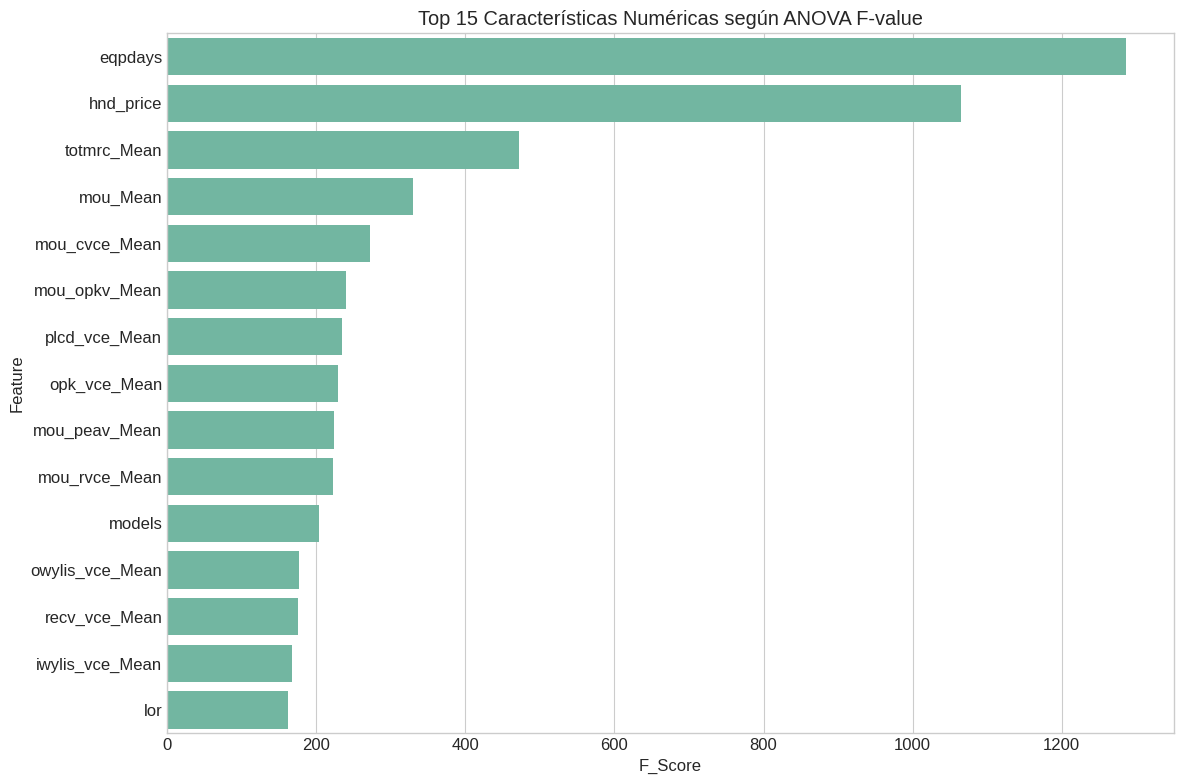


4. Selección basada en Información Mutua (solo variables numéricas):

Top 10 características numéricas según Información Mutua:
            Feature  MI_Score
36           months  0.019277
56          eqpdays  0.017587
2       totmrc_Mean  0.011761
46        hnd_price  0.008655
52           adults  0.006499
7        change_mou  0.006319
26  mouowylisv_Mean  0.006082
37         uniqsubs  0.005504
0          rev_Mean  0.005361
48           models  0.005209


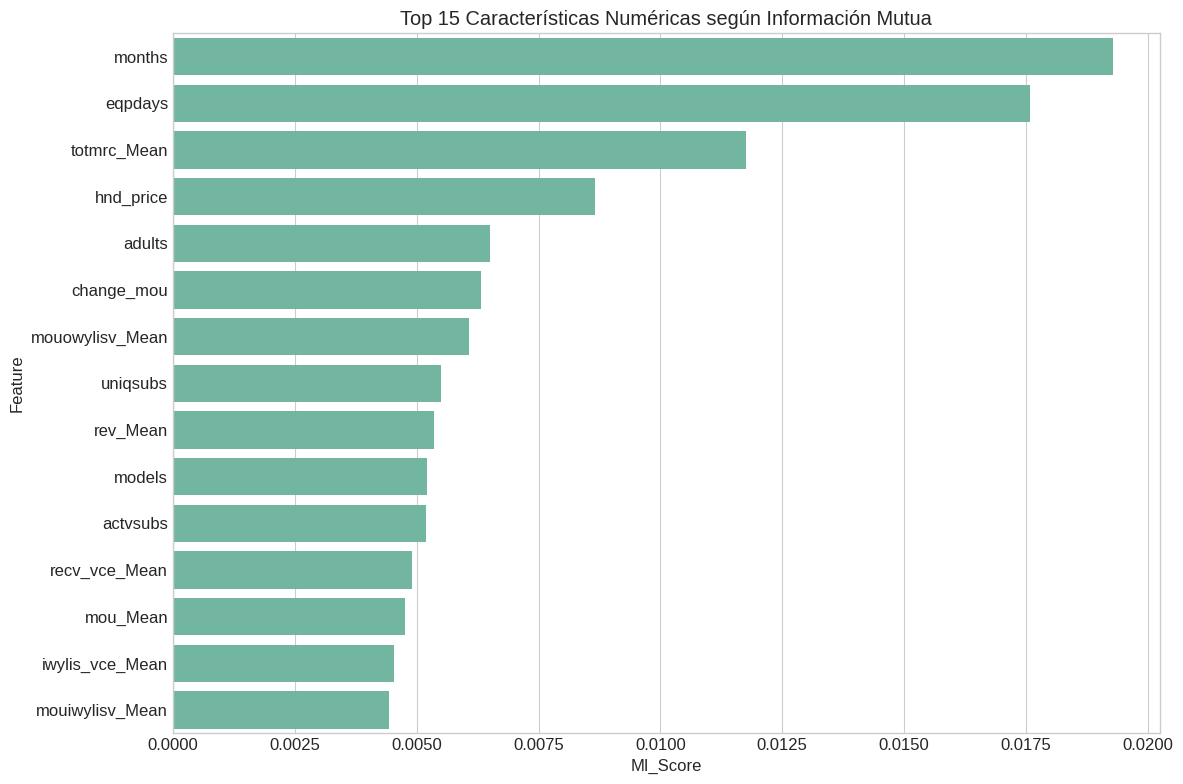


5. Selección basada en Random Forest (solo variables numéricas):

Top 10 características numéricas según Random Forest:
       Feature  Importance
56     eqpdays    0.047691
7   change_mou    0.037847
1     mou_Mean    0.033834
41      totrev    0.032934
36      months    0.032798
8   change_rev    0.032099
39    totcalls    0.031209
44      avgqty    0.031157
43      avgmou    0.031098
42      avgrev    0.031046


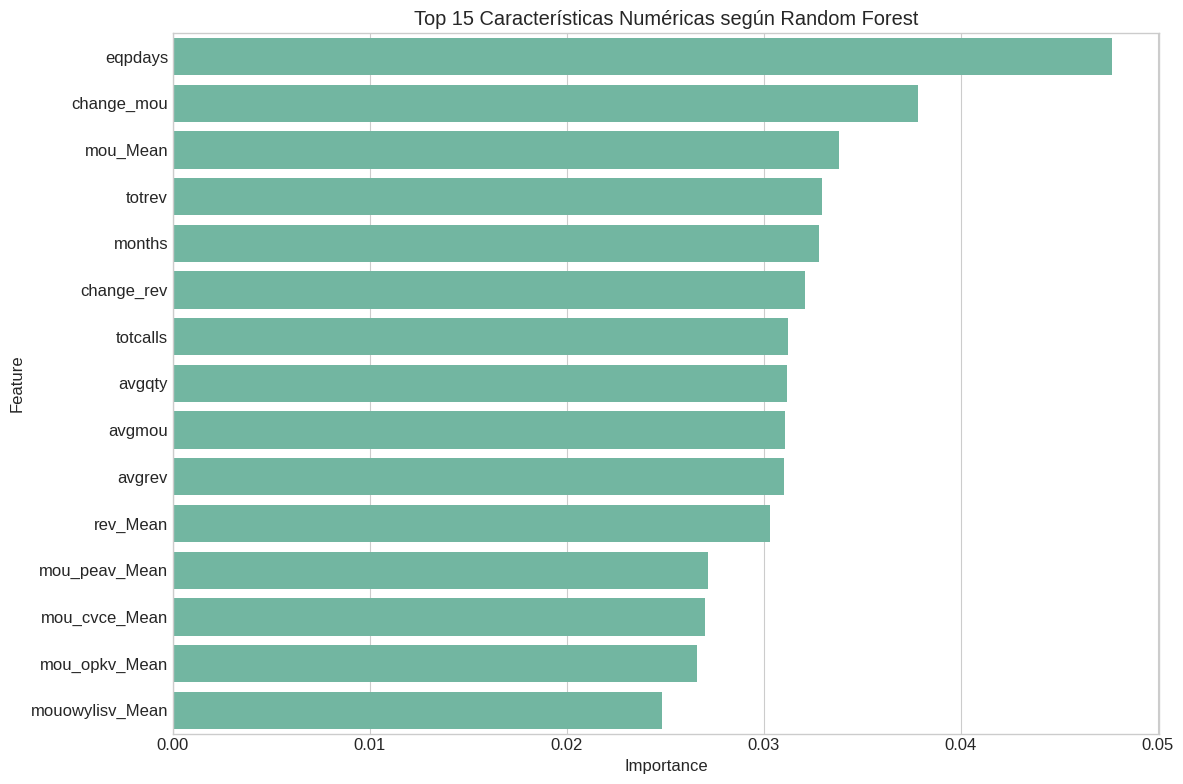


7. Análisis de características categóricas:
Se generaron 132 variables dummy a partir de 21 variables categóricas

Top 10 variables dummy según Random Forest:
                Feature  Importance
0            new_cell_U    0.034871
57   prizm_social_one_S    0.034287
92           HHstatin_C    0.028252
80           dualband_Y    0.026594
59   prizm_social_one_U    0.025835
1            new_cell_Y    0.025740
118            ethnic_N    0.025135
4           crclscod_AA    0.024615
58   prizm_social_one_T    0.024065
131          creditcd_Y    0.022504


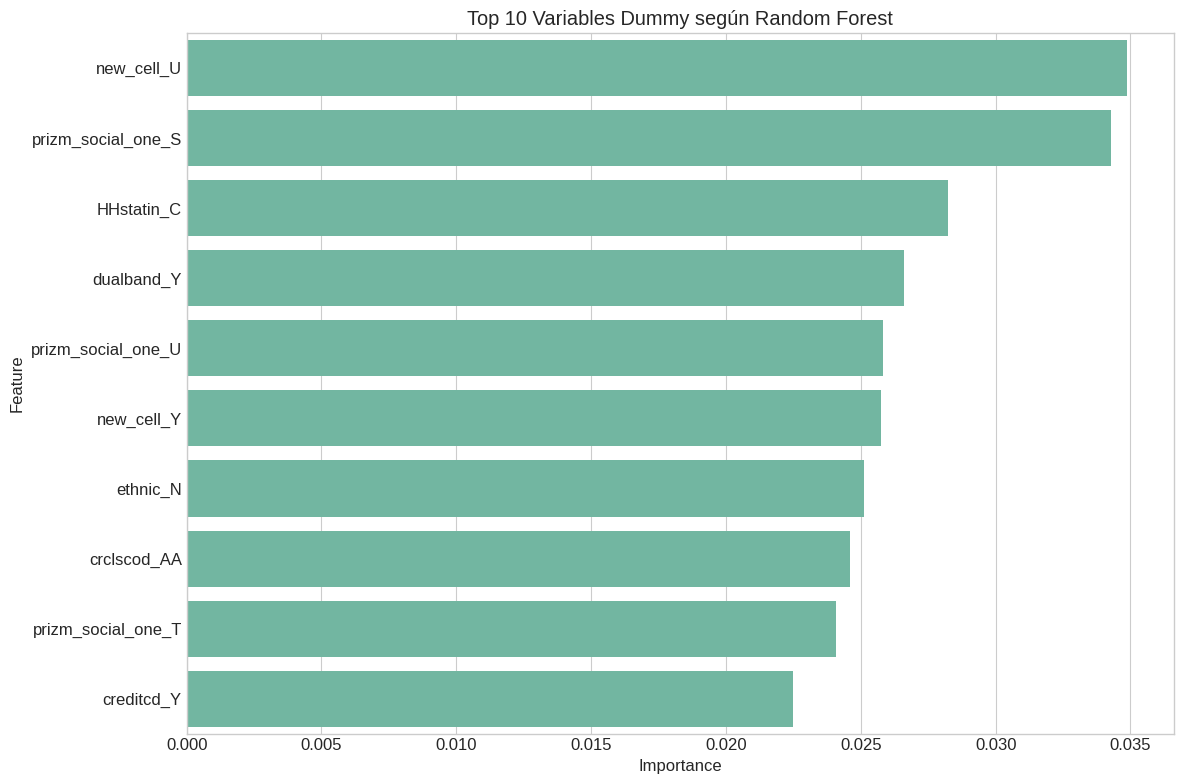


Se seleccionaron 33 variables dummy con importancia > 0.012507

Variables categóricas con dummies importantes: 15
  - new_cell: 2 dummies importantes
  - prizm_social_one: 3 dummies importantes
  - HHstatin: 2 dummies importantes
  - dualband: 1 dummies importantes
  - ethnic: 5 dummies importantes
  - crclscod: 2 dummies importantes
  - creditcd: 1 dummies importantes
  - marital: 3 dummies importantes
  - dwlltype: 1 dummies importantes
  - refurb_new: 1 dummies importantes
  - kid16_17: 1 dummies importantes
  - kid11_15: 1 dummies importantes
  - kid6_10: 1 dummies importantes
  - area: 8 dummies importantes
  - dwllsize: 1 dummies importantes

8. Características seleccionadas por múltiples métodos:

Características numéricas seleccionadas por múltiples métodos:
  - mou_Mean: seleccionada por 3 métodos
  - eqpdays: seleccionada por 3 métodos
  - rev_Mean: seleccionada por 2 métodos
  - totmrc_Mean: seleccionada por 2 métodos
  - change_mou: seleccionada por 2 métodos
  - recv_vce_

In [6]:
selected_features = feature_selection(df)

4. Preparar datos para el modelado


=== PREPARACIÓN DE DATOS PARA MODELADO ===

1. Manejo de valores faltantes:
Columnas con valores faltantes: 46
  - rev_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 48.195
  - mou_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 355.5
  - totmrc_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 44.99
  - da_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 0.2475
  - ovrmou_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 2.75
  - ovrrev_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 1.0
  - vceovr_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 0.6825
  - datovr_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 0.0
  - roam_Mean: 357 valores faltantes (0.36%)
    → Rellenado con la mediana: 0.0
  - change_mou: 891 valores faltantes (0.89%)
    → Rellenado con la mediana: -6.25
  - change_rev: 891 valores faltantes (0.89%)
    → Rel

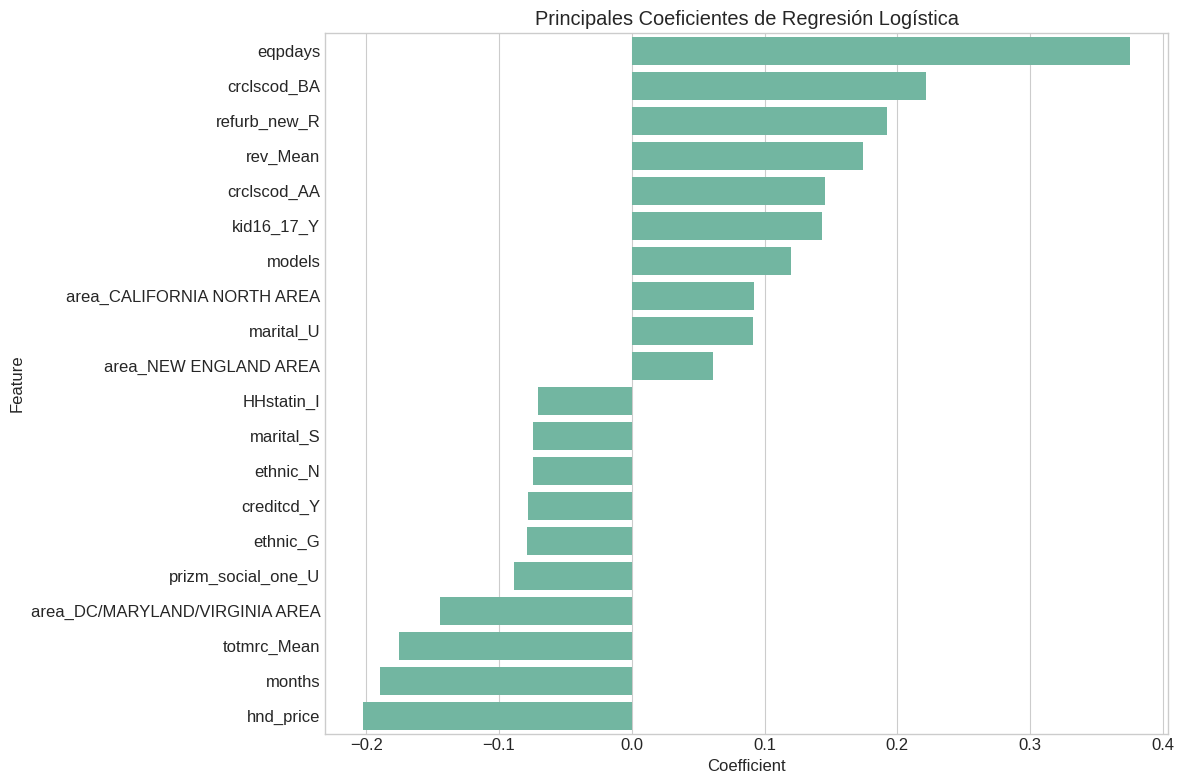

In [ ]:
X_train, X_test, y_train, y_test, initial_model = prepare_data_for_modeling(df, selected_features)

5. Modelado

In [8]:
from modelado_churn import train_logistic_regression, train_random_forest, train_xgboost


=== MODELO DE REGRESIÓN LOGÍSTICA ===

Resultados de Regresión Logística:
Accuracy: 0.5748
Precision: 0.5697
Recall: 0.5804
F1 Score: 0.5750
AUC-ROC: 0.6011


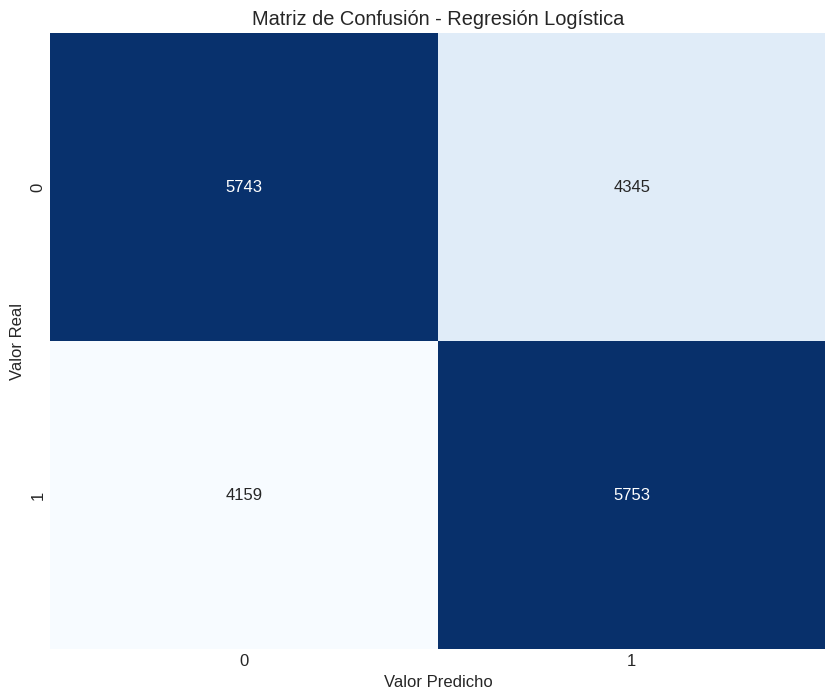

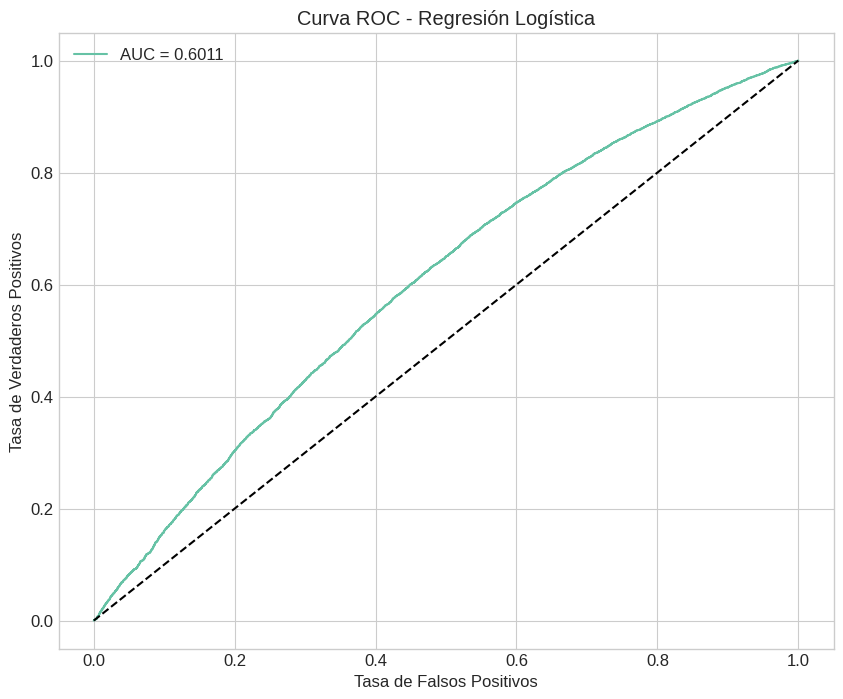

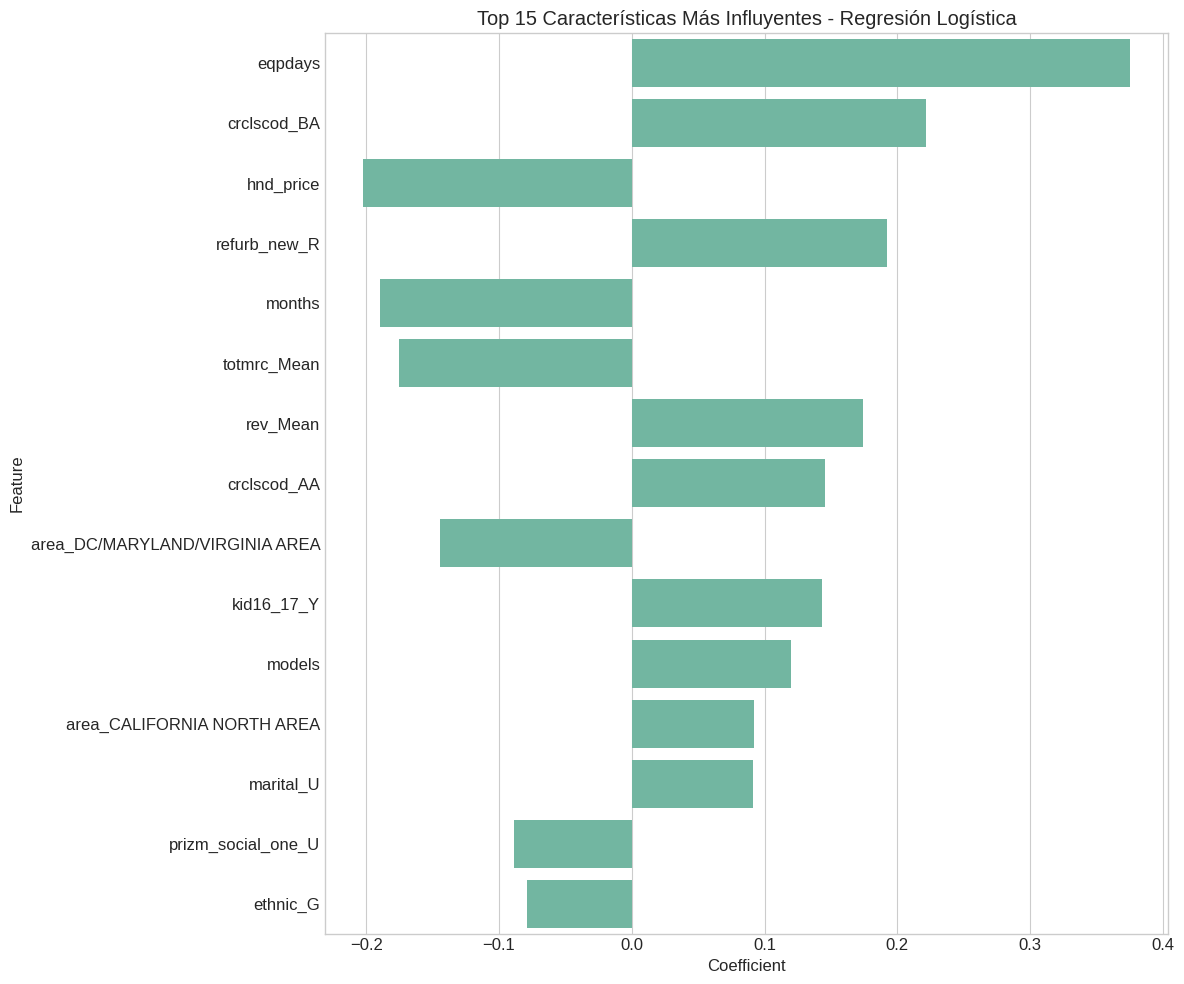

In [9]:
logreg_model, logreg_proba = train_logistic_regression(X_train, y_train, X_test, y_test)


=== MODELO RANDOM FOREST ===
AUC-ROC con validación cruzada (5-fold): 0.6555 ± 0.0016

Optimizando hiperparámetros...
Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor AUC-ROC en validación: 0.6647

Resultados de Random Forest optimizado:
Accuracy: 0.6166
Precision: 0.6032
Recall: 0.6614
F1 Score: 0.6310
AUC-ROC: 0.6673


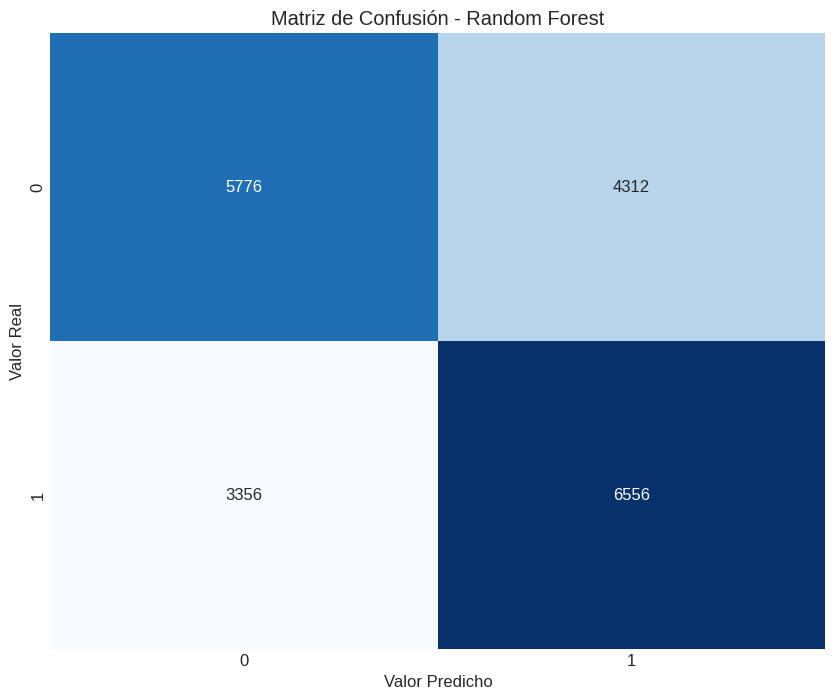

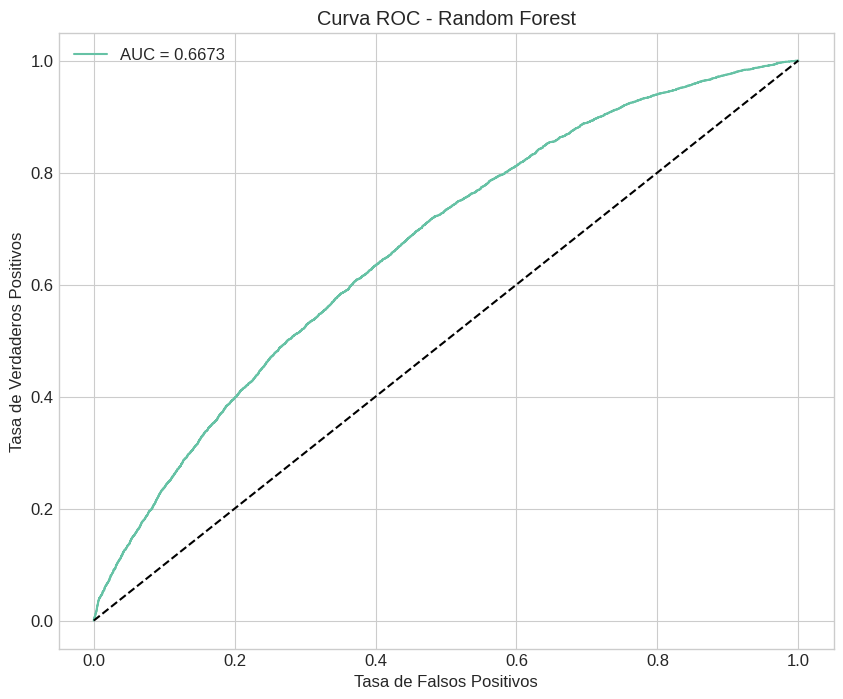

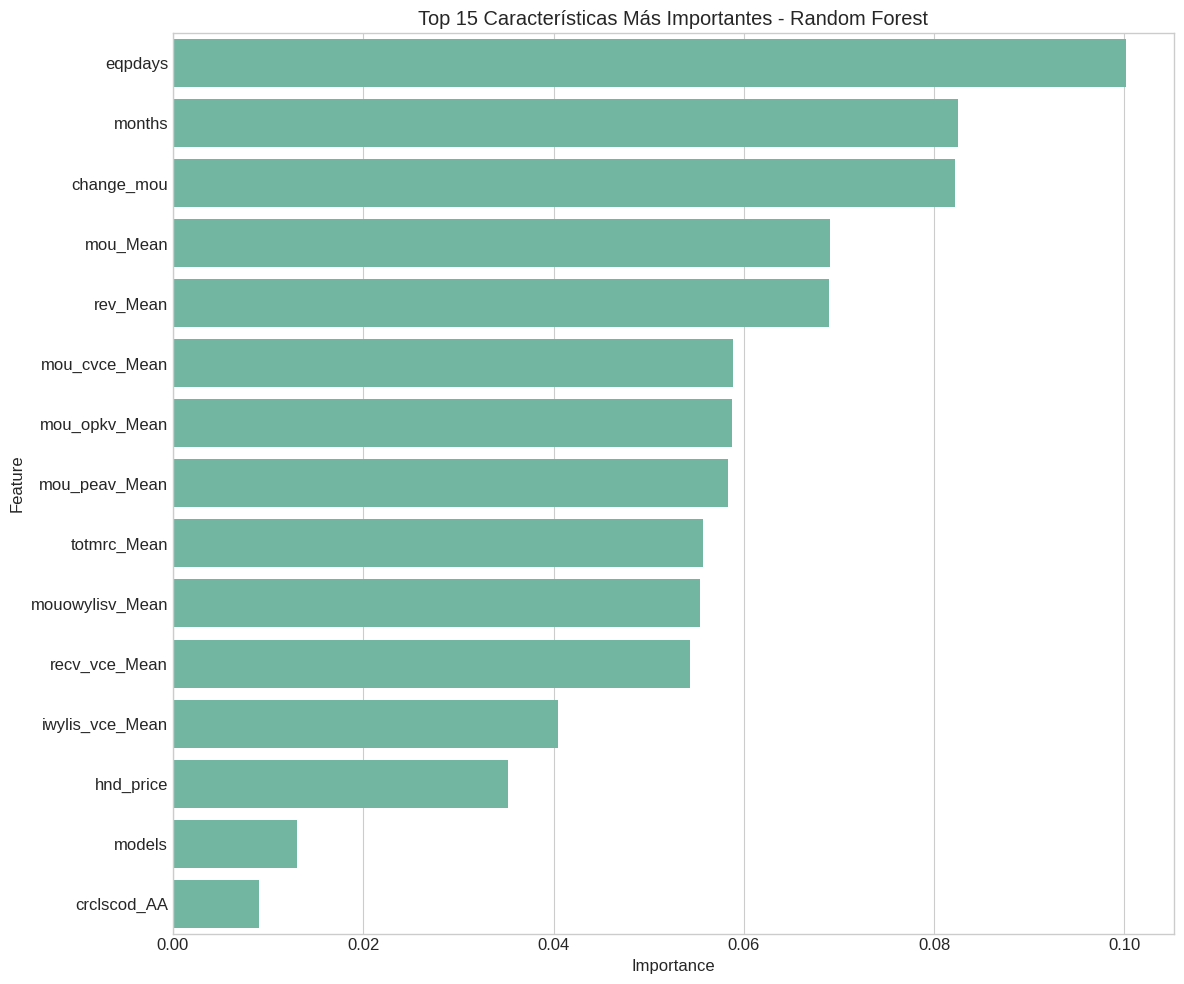

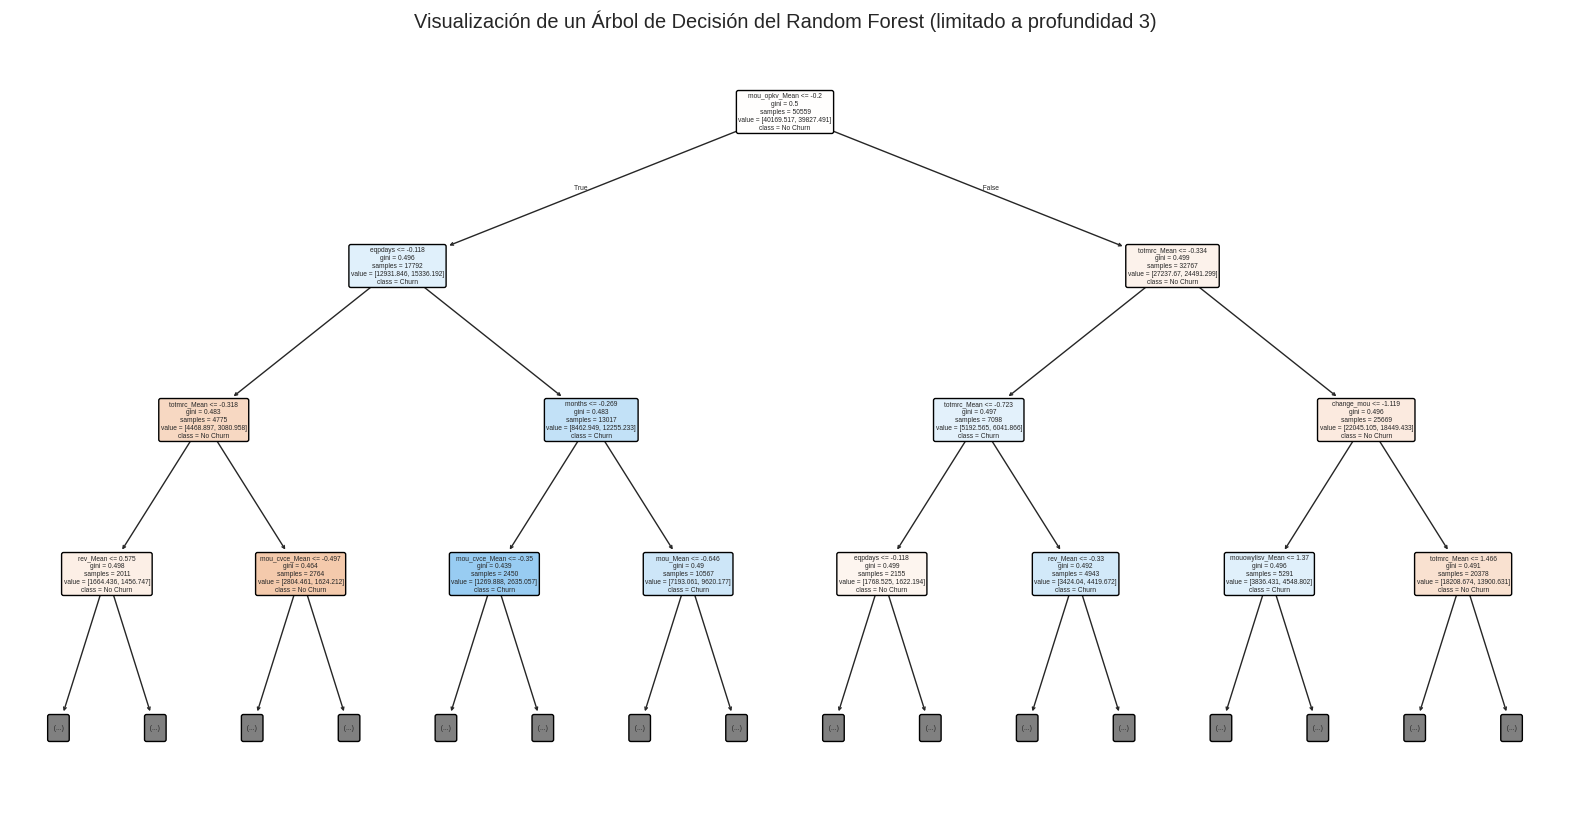

In [10]:
rf_model, rf_proba = train_random_forest(X_train, y_train, X_test, y_test)


=== MODELO XGBOOST ===
AUC-ROC con validación cruzada (5-fold): 0.6624 ± 0.0019

Optimizando hiperparámetros...
Mejores parámetros: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
Mejor AUC-ROC en validación: 0.6728

Resultados de XGBoost optimizado:
Accuracy: 0.6247
Precision: 0.6144
Recall: 0.6517
F1 Score: 0.6325
AUC-ROC: 0.6765


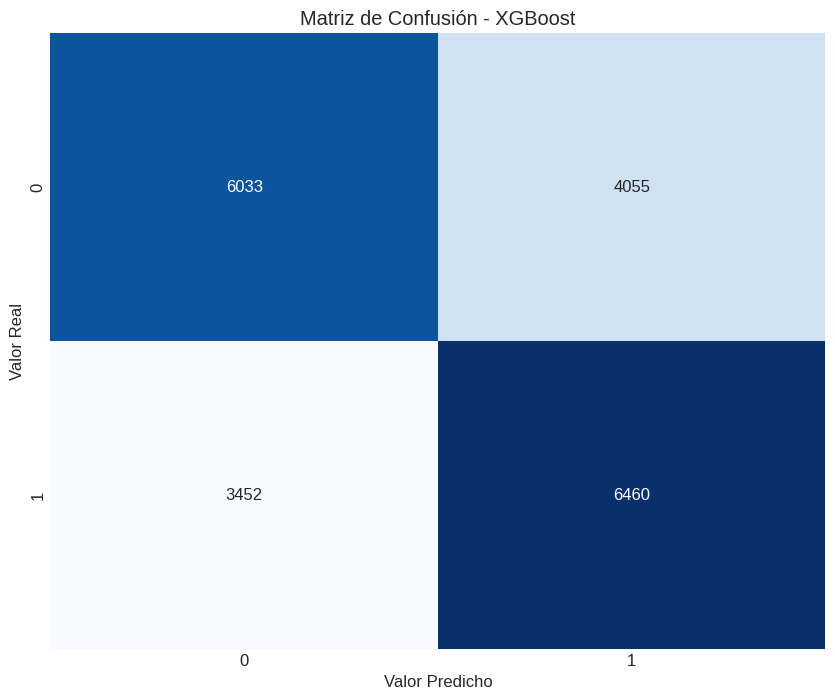

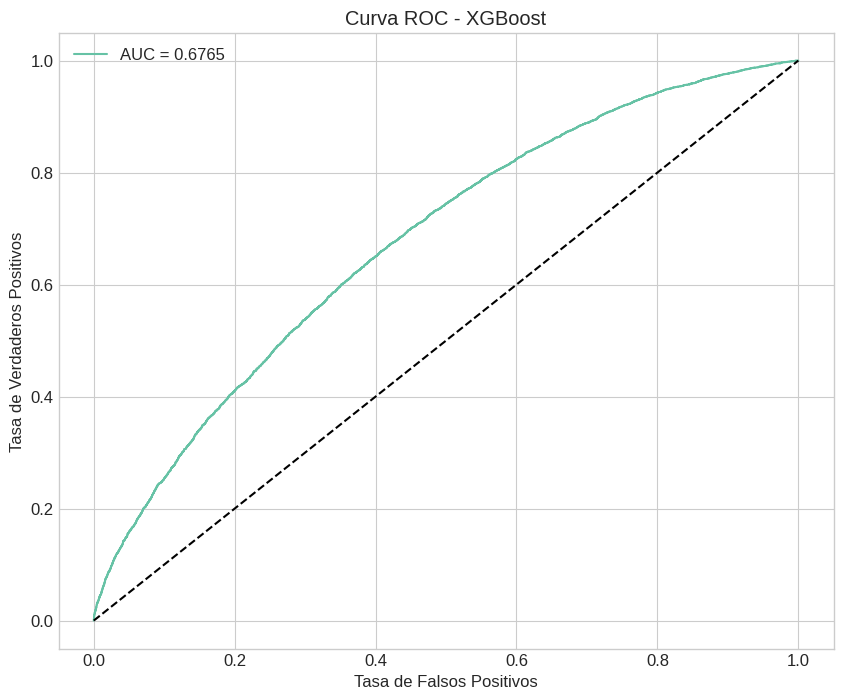

<Figure size 1200x1000 with 0 Axes>

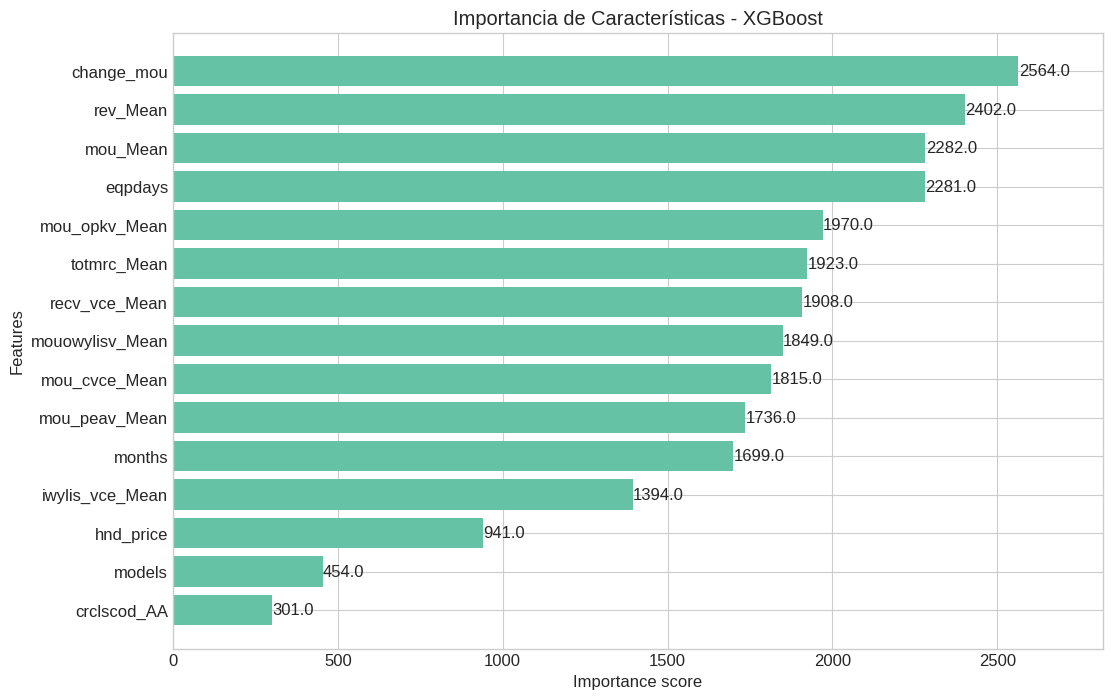

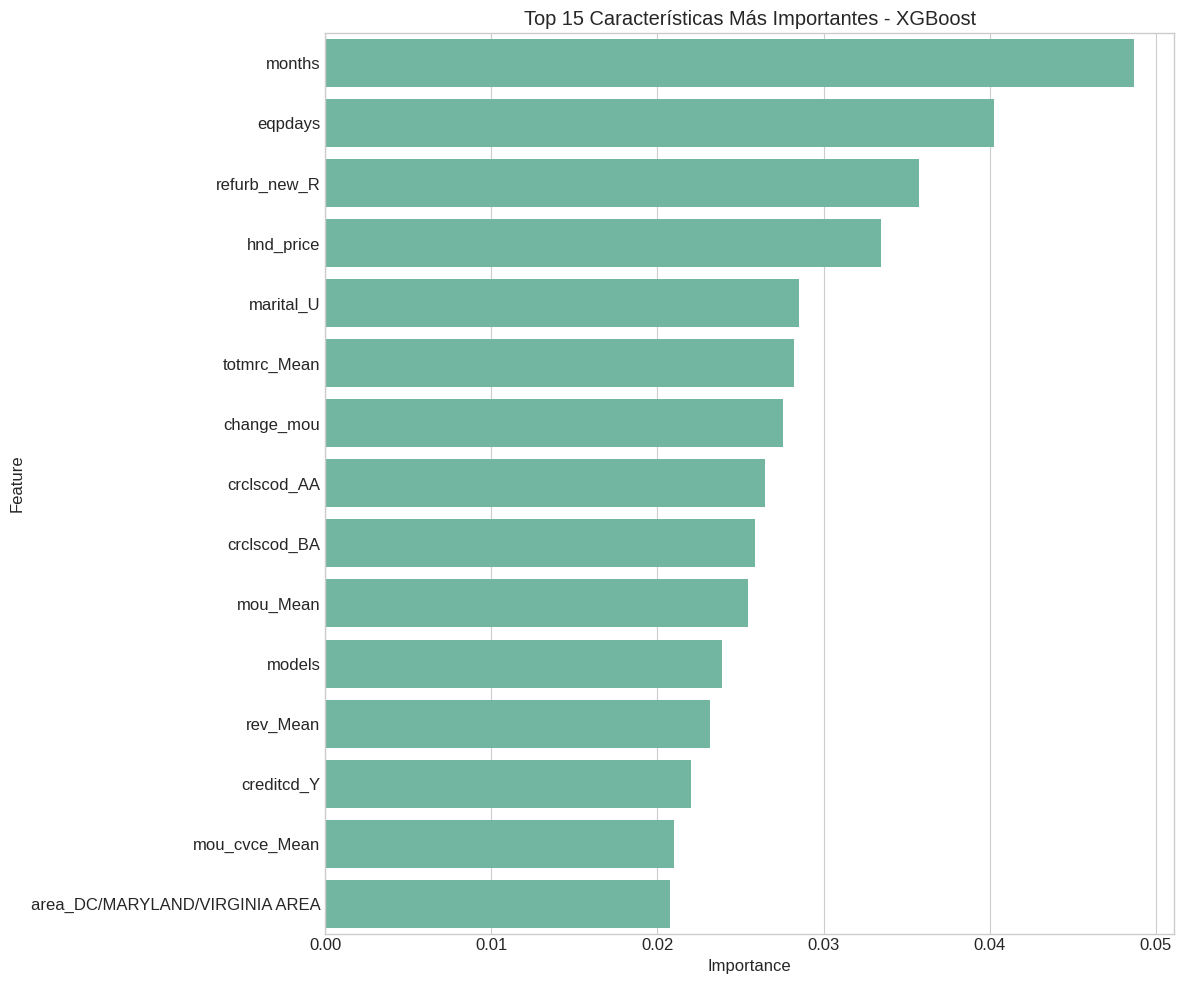

In [11]:
xgb_model, xgb_proba = train_xgboost(X_train, y_train, X_test, y_test)

6. Comparación de Modelos

In [12]:
from modelado_churn import compare_models, interpret_with_shap, predict_and_explain_customer


=== COMPARACIÓN DE MODELOS ===

Comparación de métricas:
                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Regresión Logística   0.57480   0.569717  0.580408  0.575012  0.601081
Random Forest         0.61660   0.603239  0.661421  0.630991  0.667344
XGBoost               0.62465   0.614360  0.651735  0.632496  0.676530


<Figure size 1400x1000 with 0 Axes>

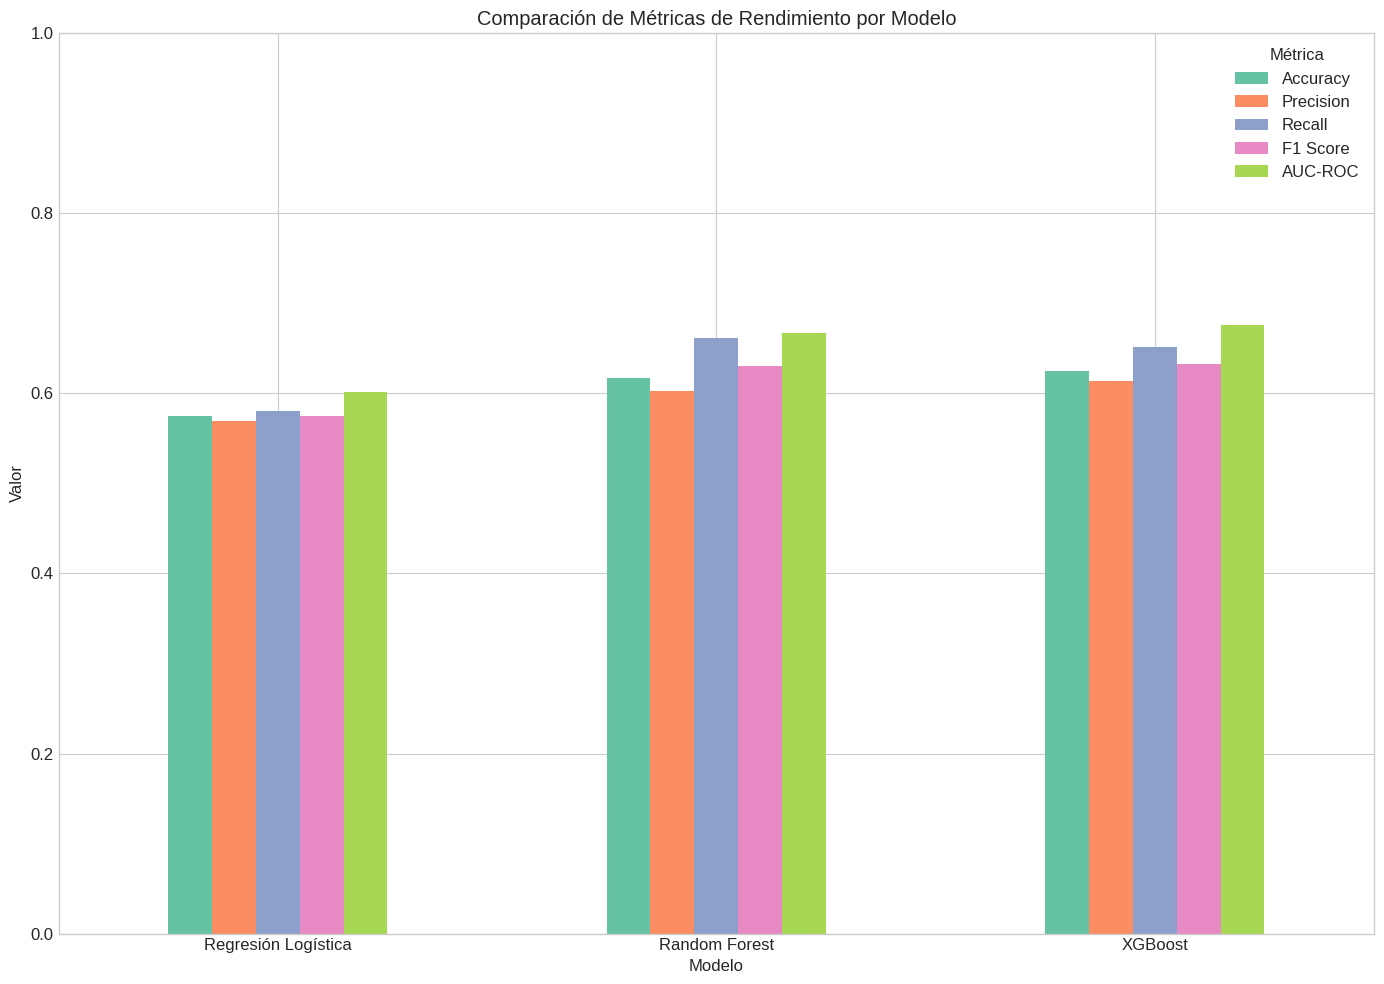

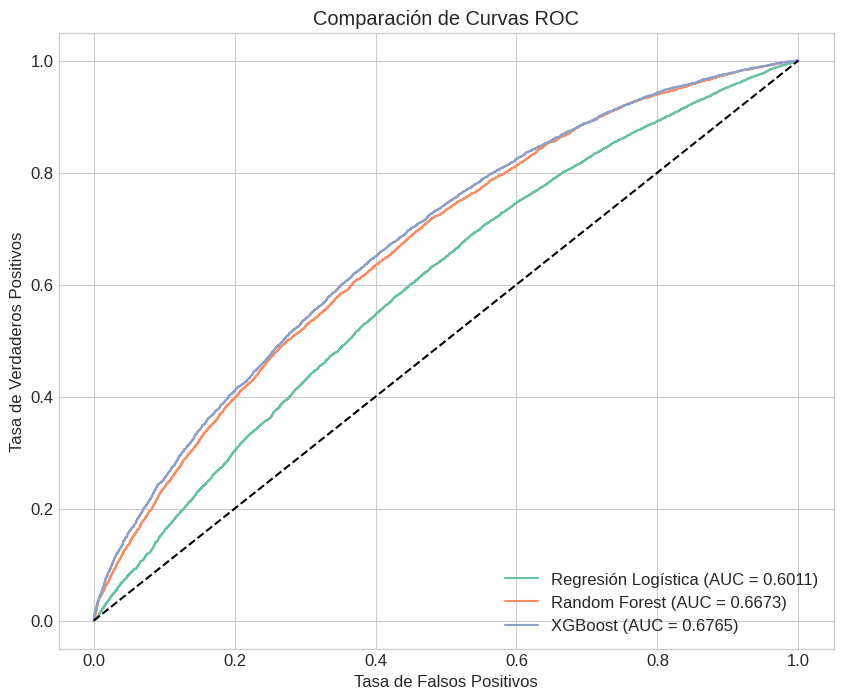


Mejor modelo según AUC-ROC: XGBoost (0.6765)


In [13]:
models_dict = {
    'Regresión Logística': (logreg_model, logreg_proba),
    'Random Forest': (rf_model, rf_proba),
    'XGBoost': (xgb_model, xgb_proba)
}

results_df, best_model_name = compare_models(models_dict, X_test, y_test)


=== INTERPRETACIÓN CON SHAP ===


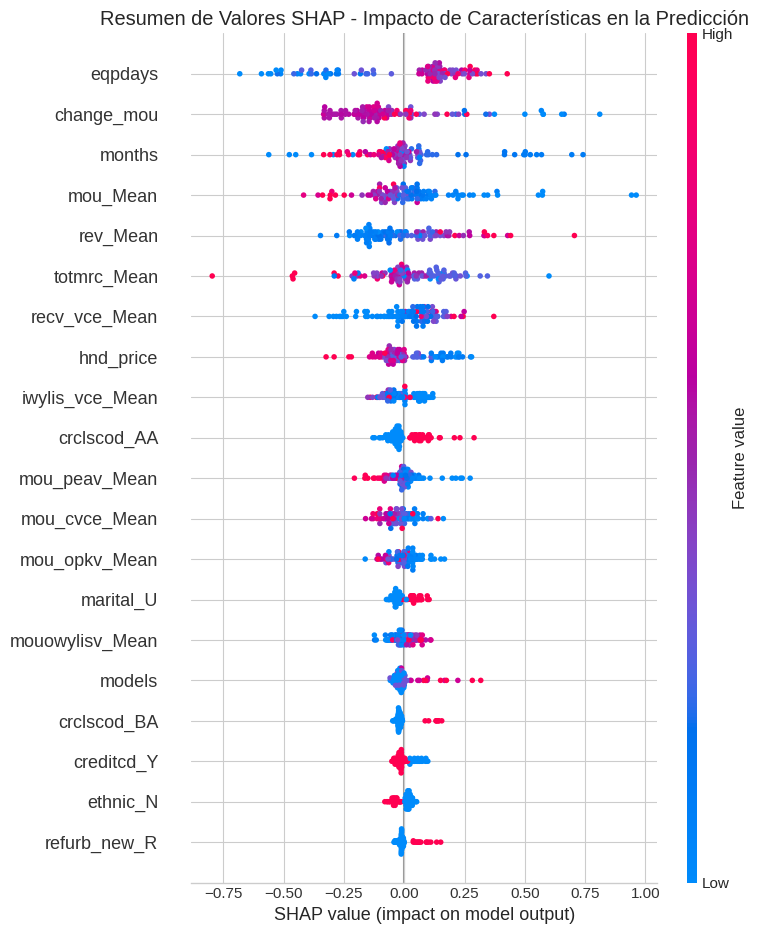

<Figure size 1000x700 with 0 Axes>

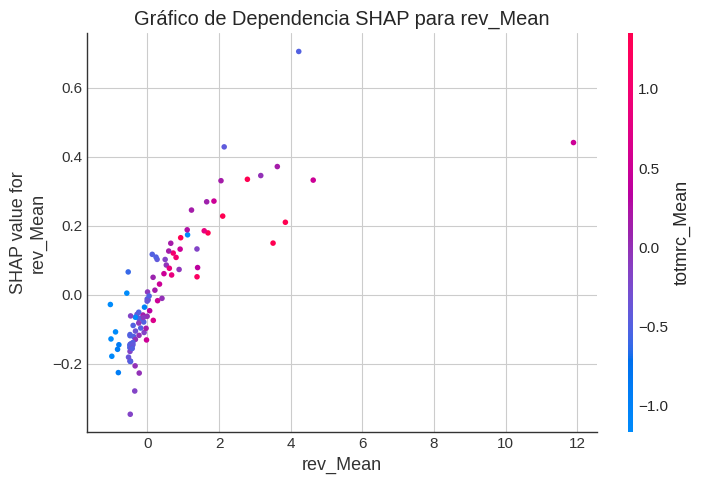

<Figure size 1000x700 with 0 Axes>

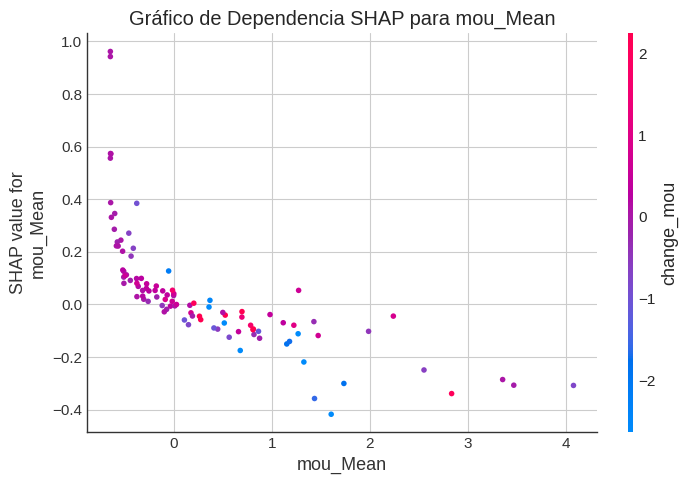

<Figure size 1000x700 with 0 Axes>

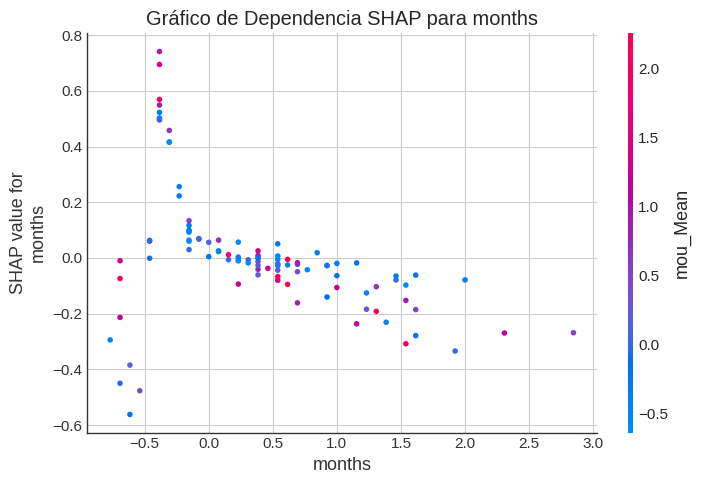

<Figure size 1000x700 with 0 Axes>

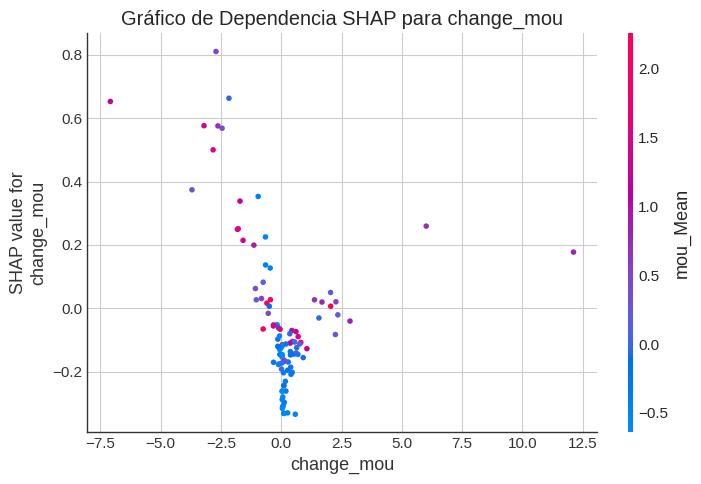

<Figure size 1000x700 with 0 Axes>

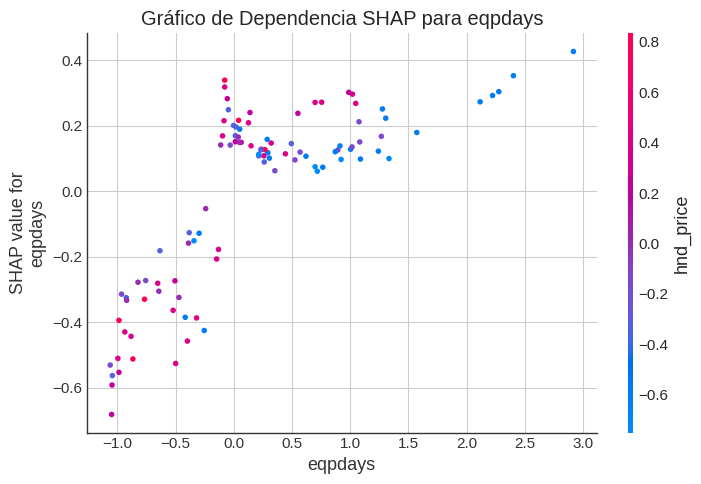

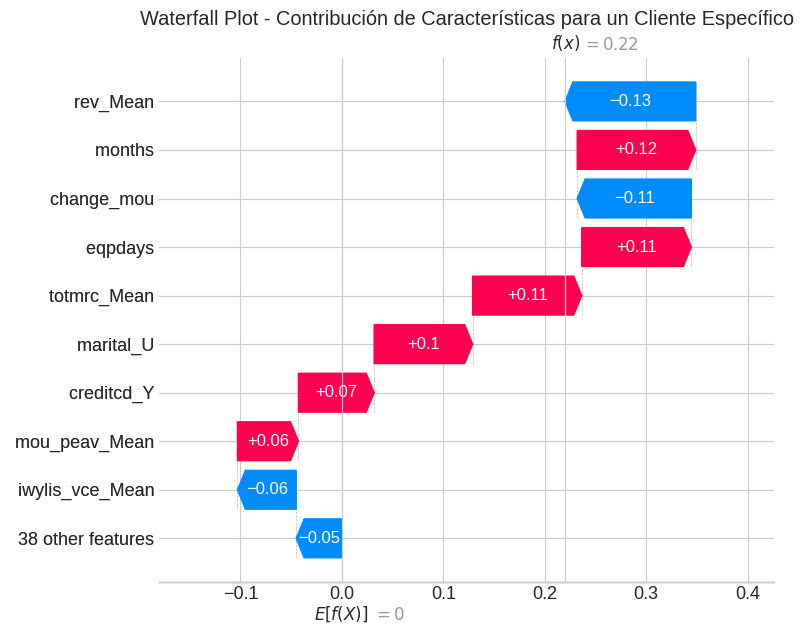

In [14]:
# Interpretar el mejor modelo con SHAP
feature_names = X_train.columns

best_model = models_dict[best_model_name][0]
explainer, _ = interpret_with_shap(best_model, X_train, X_test, feature_names)

La implementación de SHAP permite entender cómo cada variable afecta la predicción de cada cliente específico.

Elementos clave de la gráfica:

- Eje horizontal: Representa el impacto en la predicción del modelo, donde valores negativos (izquierda) reducen la probabilidad de churn y valores positivos (derecha) la aumentan.

- Eje vertical: Lista las características ordenadas por su importancia general en el modelo.

- Puntos de colores: Cada punto representa una observación (cliente), donde el color indica el valor de la característica (azul = valores bajos, rojo = valores altos).

Interpretaciones:

- eqpdays (días de equipamiento): Se observa una distribución bimodal donde valores altos (puntos rojos) tienden a aumentar la probabilidad de churn, sugiriendo que clientes con equipos más antiguos son más propensos a abandonar.

- change_mou (cambio en minutos de uso): Valores bajos (azul) aparecen más a la derecha, indicando que una disminución en el uso del servicio aumenta el riesgo de abandono.

- months (antigüedad): Una mezcla de impactos, pero valores altos (rojo) tienden a aparecer más en el extremo positivo, sugiriendo que clientes más antiguos pueden tener mayor riesgo de abandono en ciertos contextos.

- mou_Mean y rev_Mean (promedio de minutos de uso y promedio de ingresos): Distribuciones dispersas donde valores bajos (azul) generalmente contribuyen a aumentar el churn.

- totmrc_Mean (promedio de cargos mensuales recurrentes): Valores extremos (muy altos o muy bajos) parecen incrementar el riesgo de abandono.

- crclscod_AA: Los valores altos (en rojo) parecen aumentar significativamente el riesgo de churn, mientras que los valores bajos lo disminuyen.

In [15]:
print("\n=== ANÁLISIS COMPLETADO ===")
print(f"\nMejor modelo: {best_model_name}")


=== ANÁLISIS COMPLETADO ===

Mejor modelo: XGBoost
